In [6]:
import matplotlib                   #追加   ### fig:add_animation_module (1〜3行目) 
matplotlib.use('nbagg')             #追加 
import matplotlib.animation as anm  #追加
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import numpy as np

In [2]:
class World:                          ### fig:animation_prepare
    def __init__(self, debug=False): #デバッグ用のフラグを追加
        self.objects = [] 
        self.debug = debug #追加
        
    def append(self,obj): 
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(4,4))     #10〜16行目はそのまま
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel("X",fontsize=10)
        ax.set_ylabel("Y",fontsize=10)
        
        elems = []
        
        if self.debug:        
            for i in range(1000): self.one_step(i, elems, ax) #デバッグ時はアニメーションさせない
        else:
            self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems, ax), frames=10, interval=1000, repeat=False)    
            plt.show()
        
    def one_step(self, i, elems, ax):
        pass

In [3]:
class IdealRobot:
    def __init__(self, pose, color="black"):
        self.pose = pose        # 引数から姿勢の初期値を設定
        self.r = 0.2            # これは描画のためなので固定値
        self.color = color      # 引数から描画するときの色を設定
    
    def draw(self, ax):
        x, y, theta = self.pose                   # 姿勢の変数を分解して3つの変数へ
        xn = x + self.r * math.cos(theta)         #  ロボットの鼻先のx座標 
        yn = y + self.r * math.sin(theta)         #  ロボットの鼻先のy座標 
        ax.plot([x,xn], [y,yn], color=self.color) # ロボットの向きを示す線分の描画
        c = patches.Circle(xy=(x, y), radius=self.r, fill=False, color=self.color) 
        ax.add_patch(c)   # 上のpatches.Circleでロボットの胴体を示す円を作ってサブプロットへ登録

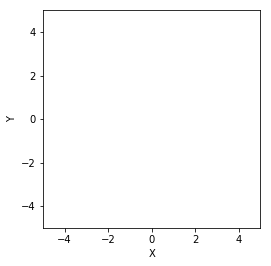

In [7]:
%matplotlib inline
world = World(debug=False)        

robot1 = IdealRobot( np.array([2, 3, math.pi/6]).T )           # ロボットのインスタンス生成（色を省略）
robot2 = IdealRobot( np.array([-2, -1, math.pi/5*6]).T, "red")  # ロボットのインスタンス生成（色を指定）
world.append(robot1)                                      # ロボットを登録 
world.append(robot2)
world.draw()